# LS88 Project

###   Imports

In [6]:
%matplotlib inline
import numpy as np
import datascience as ds
from datascience import Table, make_array, predicates, percentile
import nba_py as py
from nba_py import player
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import random

### Load all the Tables

In [7]:
print("All Games")
all_games = Table().read_table('all_games.csv', sep=',')
all_games.show(5)
print('')

print('Close Games in 4th Quarter, 6 Mintues Left')
close_games_under_six = Table().read_table('PbP_15_16_trimmed.csv', sep=',')
close_games_under_six.show(5)
print('')

print('Row Ranges of Each Game in Close Games')
game_ref = Table().read_table('gamereference.csv', sep=',')
game_ref.show(5)
print('')

print('All Players and their Relevant Stats')
player_ref = Table().read_table('player_ref.csv', sep=',')
player_ref.show(5)
print('')


label_meaning = {}
label_meaning['TS%'] = 'True Shooting Percentage'
label_meaning['EFG%'] = 'Effective Field Goal Percentage'
label_meaning['PER'] = 'ESPN PER Player Rating (A way to rank NBA players)'
label_meaning['3PAr'] = '3 Point Attempt Rate'
label_meaning['G'] = 'Games'
label_meaning['MP'] = 'Minutes Played'
label_meaning['Pos'] = 'Position'
label_meaning

All Games


GAME_ID,EVENTNUM,PCTIMESTRING,TIME,PERIOD,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,POINTS_SCORED,SHOT_MADE,SHOT_TYPE,SHOT_DIST,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_NICKNAME,ASSIST_PLAYER_ID,EVENTMSGTYPE,EVENTMSGACTIONTYPE,Row Number
21500001,0,12:00,0,1,Hawks,Pistons,0,0,0,nan,nan,nan,0,nan,nan,nan,Start Period,nan,0
21500001,1,12:00,0,1,Hawks,Pistons,0,0,0,nan,nan,nan,201143,Al Horford,Hawks,nan,Jumpball,nan,1
21500001,2,11:41,19,1,Hawks,Pistons,0,0,0,0,Layup,2,203083,Andre Drummond,Pistons,nan,Miss,Driving Layup,2
21500001,3,11:39,21,1,Hawks,Pistons,0,0,0,nan,nan,nan,203145,Kent Bazemore,Hawks,nan,Rebound,Player,3
21500001,4,11:37,23,1,Hawks,Pistons,0,0,0,nan,nan,nan,203145,Kent Bazemore,Hawks,nan,Turnover,Out of Bounds - Bad Pass Turnover,4



Close Games in 4th Quarter, 6 Mintues Left


GAME_ID,EVENTNUM,PCTIMESTRING,TIME,PERIOD,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,POINTS_SCORED,SHOT_MADE,SHOT_TYPE,SHOT_DIST,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_NICKNAME,ASSIST_PLAYER_ID,EVENTMSGTYPE,EVENTMSGACTIONTYPE
21500002,474,6:32,6.53333,4,Bulls,Cavaliers,80,79,0,nan,nan,nan,2747,J.R. Smith,Cavaliers,nan,Personal Foul,P.FOUL
21500002,476,6:20,6.33333,4,Bulls,Cavaliers,82,79,2,1,Shot,15,201565,Derrick Rose,Bulls,nan,Make,Pullup Jump Shot
21500002,479,6:01,6.01667,4,Bulls,Cavaliers,82,81,2,1,Dunk,nan,202684,Tristan Thompson,Cavaliers,2590,Make,Dunk
21500002,480,5:50,5.83333,4,Bulls,Cavaliers,82,81,0,0,Layup,2,201565,Derrick Rose,Bulls,nan,Miss,Driving Layup
21500002,481,5:48,5.8,4,Bulls,Cavaliers,82,81,0,nan,nan,nan,201567,Kevin Love,Cavaliers,nan,Rebound,Player



Row Ranges of Each Game in Close Games


HOME_TEAM,AWAY_TEAM,GAME NUMBER,FIRST_INDEX,LAST_INDEX
Bulls,Cavaliers,1,0,69
Magic,Wizards,2,70,149
Celtics,76ers,3,150,224
Pistons,Jazz,4,225,301
Pacers,Raptors,5,302,396



All Players and their Relevant Stats


Player_ID,Player,First_Name,Last_Name,TS%,EFG%,PER,3PAr,G,MP,Pos
201166,Aaron Brooks,Aaron,Brooks,0.49333,0.470588,11.8,0.394,69,1108,PG
203932,Aaron Gordon,Aaron,Gordon,0.541176,0.506757,17,0.245,78,1863,PF
1626151,Aaron Harrison,Aaron,Harrison,0.386598,0.277778,4.3,0.526,21,93,SG
203940,Adreian Payne,Adreian,Payne,0.413907,0.392857,5.6,0.221,52,486,PF
201143,Al Horford,Al,Horford,0.562796,0.550781,19.4,0.244,82,2631,C


{'3PAr': '3 Point Attempt Rate',
 'EFG%': 'Effective Field Goal Percentage',
 'G': 'Games',
 'MP': 'Minutes Played',
 'PER': 'ESPN PER Player Rating (A way to rank NBA players)',
 'Pos': 'Position',
 'TS%': 'True Shooting Percentage'}

# Question 1

## Part 1.1: Create Shot Count Table

### Helper Functions

In [53]:
def shots_all_players(table):
    #This function finds the number of shots that each player takes in time period
    #(it doesn't distinguish the type of shot)
    #it can be used for an entire game or for the last 6 minutes
    shots = table.where('EVENTMSGTYPE', predicates.are.containing('M'))
    players = shots.select('EVENTMSGTYPE', 'PLAYER1_NAME', 'PLAYER1_TEAM_NICKNAME', 'HOME_TEAM', 'AWAY_TEAM')
    count = players.groups(['PLAYER1_NAME', "PLAYER1_TEAM_NICKNAME"])
    return count

def seperate_teams(table):
    #This function creates two tables from the last_six_minutes_table for each team
    return table.group("PLAYER1_TEAM_NICKNAME").column(0)

def max_shot_player_each_team_name(table):
    #This takes in a table of one game (entire game or last 6 minutes)
    #It returns the player who shoots the most for each team
    team_names = seperate_teams(table)
    player_team_one = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).sort('count', descending=True).column('PLAYER1_NAME').item(0)
    player_team_two = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).sort('count', descending=True).column('PLAYER1_NAME').item(0)
    return player_team_one, player_team_two

def max_shots(table):
    #This takes in a table of one game (entire game or last 6 minutes)
    #It returns the player who shoots the most for each team
    team_names = seperate_teams(table)
    shots_player_one = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).sort('count', descending=True).column('count').item(0)
    shots_player_two = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).sort('count', descending=True).column('count').item(0)
    return shots_player_one, shots_player_two

def total_shot_number(table):
    #returns the number of shots for each team in the last 6 minutes
    team_names = seperate_teams(table)
    total_shots1 = sum(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).column("count"))
    total_shots2 = sum(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).column("count"))
    return (total_shots1, total_shots2)

def average_player_each_team(table):
    #returns the number of shots of the average player
    team_names = seperate_teams(table)
    average_shots1 = np.average(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).column("count"))
    average_shots2 = np.average(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).column("count"))
    return average_shots1, average_shots2




### Construct Table

In [54]:
close_game_ids = close_games_under_six.group('GAME_ID').column(0)

def player_most_shots():
    player_names = make_array()
    for i in close_game_ids:
        game = close_games_under_six.where("GAME_ID", i)
        shots = shots_all_players(game)
        max_players = max_shot_player_each_team_name(shots)
        player_names = np.append(player_names, max_players)
        
def most_shot_count():
    stats = make_array()
    for i in close_game_ids:
        game = close_games_under_six.where("GAME_ID", i)
        shots = shots_all_players(game)
        max_stat = max_shots(shots)
        stats = np.append(stats, max_stat)
        
def average_shot_count():
    average= make_array()
    for i in close_game_ids:
        game = close_games_under_six.where("GAME_ID", i)
        shots = shots_all_players(game)
        average_stat = average_player_each_team(shots)
        average = np.append(average, average_stat)

def order_game_ids():
    array = make_array()
    k = 0
    for i in np.arange(best_players.num_rows):
        if i % 2 == 0:
            k += 1
        array = np.append(array, k)
        

In [55]:
def create_table():
    best_players= Table().with_columns("Game", array, "Player Name", player_names, "Number Shots", stats, "Average Shots", average)
    best_players.to_csv('max_shot_players.csv')

### Shout Count Table:

In [56]:
best_players = Table().read_table('max_shot_players.csv')
best_players

table1 = player_ref.join('Player', close_game_players, "PLAYER1_NAME").select('Player', 'PER', 'TS%', 'EFG%', )
table2= best_players.join('Player Name', table1, "Player")
table2

Player Name,Game,Number Shots,Average Shots,PER,TS%,EFG%
Aaron Brooks,213,5,2.16667,11.8,0.49333,0.470588
Aaron Brooks,387,4,2.2,11.8,0.49333,0.470588
Aaron Brooks,514,4,2,11.8,0.49333,0.470588
Aaron Gordon,596,4,2.8,17,0.541176,0.506757
Al Horford,374,6,2.6,19.4,0.562796,0.550781
Al Horford,433,5,2,19.4,0.562796,0.550781
Al Horford,507,6,2.4,19.4,0.562796,0.550781
Al Horford,515,4,1.83333,19.4,0.562796,0.550781
Al Horford,585,3,1.57143,19.4,0.562796,0.550781
Al-Farouq Aminu,75,5,2.75,12.7,0.529265,0.494318


## Part 1.2: Join Shot Count Table with Best Players Table

### Helper Functions

In [80]:
def split_home(game):
# This function is a helper takes a game and takes shots by home players only
    home_team = game.column('HOME_TEAM').item(0)
    home_table = game.where('PLAYER1_TEAM_NICKNAME', home_team)
    return home_table

def split_away(game):
# This function is a helper takes a game and takes shots by home players only
    away_team = game.column('AWAY_TEAM').item(0)
    away_table = game.where('PLAYER1_TEAM_NICKNAME', away_team)
    return away_table

def players(gamez): 
    # returns a list of players IDs in the table   
    players = make_array()
    
    for i in np.arange(gamez.num_rows):
        player_id = gamez.row(i).item('PLAYER1_NAME')
        if not player_id in players:
            players = np.append(player_id, players)
    
    return players

def find_best_player(players):
    # returns the best player based on PER
    ranking = Table(make_array('Player','Per'))
    pers = make_array()
    for idee in players:
        try:
            per = player_ref.where('Player', idee).column(6).item(0)
            print(type(per))
        except:
            per = 0
        ranking = ranking.with_row([idee, float(per)])
        
    
    ranking = ranking.sort('Per', True).where("Per", predicates.are.not_equal_to('OOPS'))
    
    print(ranking)
    return ranking.column('Player').item(0)

    
def generate_best_players_list():
    
    best_players = make_array()

    for i in np.arange(game_ref.num_rows):
        first = int(game_ref.row(i).item('FIRST_INDEX'))
        last = int(game_ref.row(i).item('LAST_INDEX'))
        game = close_games_under_six.take(np.arange(first, last + 1))

        home = split_home(game)
        away = split_away(game)

        players_h = players(home)
        players_a = players(away)

        best_player_home = find_best_player(players_h)
        best_player_away = find_best_player(players_a)

        best_players = np.append(best_players, best_player_home)
        best_players = np.append(best_players, best_player_away)

    return best_players

def create_final_table():
    y = y.with_column('Best_Player', best_players) 
    y.to_csv('best_players.csv')
   

In [164]:
pers = table2.groups(['Player Name', 'PER'])
pers

Player Name,PER,count
Aaron Brooks,11.8,3
Aaron Gordon,17,1
Al Horford,19.4,5
Al-Farouq Aminu,12.7,1
Alec Burks,14.3,3
Allen Crabbe,12.2,1
Andre Drummond,21.2,2
Andrew Nicholson,14.8,2
Andrew Wiggins,16.5,16
Anthony Davis,25,10


In [166]:
def max_shots(table):
    made = table.where('SHOT_MADE', 1)
    not_made = table.where('SHOT_MADE', 0)
    return made.append(not_made).group('PLAYER1_NAME').sort('count', True).row(0).item(0)


yes = close_games_under_six.group('GAME_ID').column(0)

pers = table2.groups(['Player Name', 'PER']).drop('count')

def get_best_per(table):
    players = table.group('PLAYER1_NAME').select('PLAYER1_NAME')
    best = pers.join('Player Name', players, 'PLAYER1_NAME').sort('PER', True).row(0).item(0)
    return best

def most():
    
    hm1 = make_array()
    hm2 = make_array()
    
    count = 0
    
    for ideee in yes:
        print(ideee)
        print("Iterations left: ", len(yes) - count)
        game5 = close_games_under_six.where('GAME_ID', ideee)
        
        home = split_home(game5)
        away = split_away(game5)
        
        most_home = max_shots(home)
        best_home = get_best_per(home)
        print(most_home)
        print(best_home)
        most_away = max_shots(away)
        best_away = get_best_per(away)
        print(most_away)
        print(best_away)
        
        hm1 = np.append(hm1, most_home)
        hm1 = np.append(hm1, most_away)
        hm2 = np.append(hm2, best_home)
        hm2 = np.append(hm2, best_away)
        count += 1
        print('')
    
    done = Table().with_column('most', hm1).with_column('best', hm2)
    
    return done

yep = most()
yep


21500002
Iterations left:  689
Derrick Rose
Pau Gasol
LeBron James
LeBron James

21500004
Iterations left:  688
Tobias Harris
Nikola Vucevic
Bradley Beal
John Wall

21500005
Iterations left:  687
Terry Rozier
Isaiah Thomas
Jahlil Okafor
Jahlil Okafor

21500007
Iterations left:  686
Reggie Jackson
Andre Drummond
Alec Burks
Derrick Favors

21500009
Iterations left:  685
Paul George
Paul George
DeMar DeRozan
Kyle Lowry

21500013
Iterations left:  684
Russell Westbrook
Kevin Durant
LaMarcus Aldridge
Kawhi Leonard

21500016
Iterations left:  683
Paul Pierce
Chris Paul
Rudy Gay
DeMarcus Cousins

21500017
Iterations left:  682
Kobe Bryant
Lou Williams
Ricky Rubio
Karl-Anthony Towns

21500018
Iterations left:  681
Paul George
Paul George
Mike Conley
Mike Conley

21500022
Iterations left:  680
Russell Westbrook
Kevin Durant
Elfrid Payton
Nikola Vucevic

21500025
Iterations left:  679
Derrick Rose
Pau Gasol
Reggie Jackson
Andre Drummond

21500027
Iterations left:  678
Jerryd Bayless
Greg Monroe


Luol Deng
Hassan Whiteside
Zach LaVine
Karl-Anthony Towns

21500162
Iterations left:  593
Nicolas Batum
Kemba Walker
Arron Afflalo
Carmelo Anthony

21500163
Iterations left:  592
Jameer Nelson
Nikola Jokic
Jrue Holiday
Jrue Holiday

21500164
Iterations left:  591
Stephen Curry
Stephen Curry
DeMar DeRozan
Kyle Lowry

21500165
Iterations left:  590
Thaddeus Young
Brook Lopez
Jeremy Lin
Kemba Walker

21500166
Iterations left:  589
Zach LaVine
Karl-Anthony Towns
Andrew Nicholson
Tobias Harris

21500168
Iterations left:  588
Jared Sullinger
Isaiah Thomas
Dirk Nowitzki
Dirk Nowitzki

21500169
Iterations left:  587
Lamar Patterson
Paul Millsap
Rajon Rondo
DeMarcus Cousins

21500170
Iterations left:  586
James Harden
James Harden
Damian Lillard
Damian Lillard

21500171
Iterations left:  585
Ish Smith
Ryan Anderson
Russell Westbrook
Russell Westbrook

21500173
Iterations left:  584
DeMar DeRozan
Kyle Lowry
Gordon Hayward
Derrick Favors

21500174
Iterations left:  583
Jimmy Butler
Pau Gasol
Bran

Danilo Gallinari
Kenneth Faried
Elfrid Payton
Nikola Vucevic

21500318
Iterations left:  497
DeMarcus Cousins
DeMarcus Cousins
Alec Burks
Derrick Favors

21500319
Iterations left:  496
Isaiah Thomas
Isaiah Thomas
Jimmy Butler
Pau Gasol

21500321
Iterations left:  495
Jason Terry
James Harden
John Wall
John Wall

21500322
Iterations left:  494
Reggie Jackson
Andre Drummond
Marc Gasol
Mike Conley

21500323
Iterations left:  493
Manu Ginobili
Kawhi Leonard
DeMar DeRozan
Kyle Lowry

21500324
Iterations left:  492
Blake Griffin
Chris Paul
O.J. Mayo
Greg Monroe

21500325
Iterations left:  491
D'Angelo Russell
Lou Williams
Kevin Martin
Karl-Anthony Towns

21500326
Iterations left:  490
Nikola Vucevic
Nikola Vucevic
Eric Bledsoe
Eric Bledsoe

21500328
Iterations left:  489
Kent Bazemore
Paul Millsap
Deron Williams
Dirk Nowitzki

21500329
Iterations left:  488
Shane Larkin
Brook Lopez
Jahlil Okafor
Jahlil Okafor

21500330
Iterations left:  487
Derrick Rose
Pau Gasol
Chris Paul
Chris Paul

21500

Kyle Lowry
Kyle Lowry
John Wall
John Wall

21500478
Iterations left:  402
Jimmy Butler
Pau Gasol
Monta Ellis
Paul George

21500479
Iterations left:  401
Tayshaun Prince
Karl-Anthony Towns
Trey Burke
Gordon Hayward

21500482
Iterations left:  400
Will Barton
Nikola Jokic
Maurice Harkless
Mason Plumlee

21500483
Iterations left:  399
Ish Smith
Jahlil Okafor
Marco Belinelli
DeMarcus Cousins

21500485
Iterations left:  398
Klay Thompson
Draymond Green
James Harden
James Harden

21500487
Iterations left:  397
Chris Paul
Chris Paul
Anthony Davis
Anthony Davis

21500488
Iterations left:  396
Kevin Durant
Kevin Durant
Brandon Knight
Tyson Chandler

21500490
Iterations left:  395
Evan Fournier
Nikola Vucevic
John Wall
John Wall

21500492
Iterations left:  394
Marvin Williams
Kemba Walker
Terrence Ross
Kyle Lowry

21500494
Iterations left:  393
Nick Young
Lou Williams
Ish Smith
Jahlil Okafor

21500495
Iterations left:  392
Brook Lopez
Brook Lopez
Isaiah Thomas
Isaiah Thomas

21500498
Iterations 

Kent Bazemore
Al Horford
Archie Goodwin
Tyson Chandler

21500661
Iterations left:  307
Danilo Gallinari
Nikola Jokic
Reggie Jackson
Andre Drummond

21500663
Iterations left:  306
Paul George
Paul George
DeMarcus Cousins
DeMarcus Cousins

21500664
Iterations left:  305
Thaddeus Young
Brook Lopez
Russell Westbrook
Kevin Durant

21500667
Iterations left:  304
Tristan Thompson
LeBron James
Zach LaVine
Karl-Anthony Towns

21500669
Iterations left:  303
Aaron Brooks
Pau Gasol
Chris Bosh
Dwyane Wade

21500670
Iterations left:  302
Marc Gasol
Mike Conley
Nikola Vucevic
Nikola Vucevic

21500671
Iterations left:  301
James Harden
James Harden
Jrue Holiday
Jrue Holiday

21500673
Iterations left:  300
Reggie Jackson
Andre Drummond
Gordon Hayward
Derrick Favors

21500674
Iterations left:  299
Kemba Walker
Kemba Walker
Rudy Gay
DeMarcus Cousins

21500676
Iterations left:  298
Paul George
Paul George
Chris Paul
Chris Paul

21500677
Iterations left:  297
Ish Smith
Ish Smith
Archie Goodwin
Markieff Mor

Reggie Jackson
Andre Drummond
Anthony Davis
Anthony Davis

21500826
Iterations left:  212
Ronnie Price
Mirza Teletovic
Patty Mills
LaMarcus Aldridge

21500827
Iterations left:  211
Wayne Ellington
Brook Lopez
Kemba Walker
Kemba Walker

21500828
Iterations left:  210
Monta Ellis
Paul George
Victor Oladipo
Nikola Vucevic

21500829
Iterations left:  209
Lance Stephenson
Mike Conley
DeMar DeRozan
Kyle Lowry

21500831
Iterations left:  208
Derrick Rose
Pau Gasol
D'Angelo Russell
Lou Williams

21500832
Iterations left:  207
CJ McCollum
Damian Lillard
Derrick Favors
Derrick Favors

21500834
Iterations left:  206
Paul George
Paul George
Dwyane Wade
Hassan Whiteside

21500836
Iterations left:  205
Tim Hardaway Jr.
Paul Millsap
Stephen Curry
Stephen Curry

21500838
Iterations left:  204
Isaiah Thomas
Isaiah Thomas
Shabazz Muhammad
Karl-Anthony Towns

21500840
Iterations left:  203
Victor Oladipo
Nikola Vucevic
Ish Smith
Jahlil Okafor

21500842
Iterations left:  202
D.J. Augustin
Nikola Jokic
DeM

Jared Sullinger
Isaiah Thomas
Jordan Hill
Paul George

21501005
Iterations left:  117
Kyrie Irving
Kyrie Irving
Zaza Pachulia
Dirk Nowitzki

21501007
Iterations left:  116
Kent Bazemore
Paul Millsap
Reggie Jackson
Andre Drummond

21501012
Iterations left:  115
Paul George
Paul George
DeMar DeRozan
Kyle Lowry

21501013
Iterations left:  114
Hollis Thompson
Ish Smith
Marcus Thornton
John Wall

21501014
Iterations left:  113
Nicolas Batum
Kemba Walker
Dwyane Wade
Hassan Whiteside

21501016
Iterations left:  112
Sergey Karasev
Brook Lopez
Jimmy Butler
Jimmy Butler

21501017
Iterations left:  111
Matt Barnes
Lance Stephenson
Tyler Ennis
John Henson

21501020
Iterations left:  110
LeBron James
LeBron James
Evan Fournier
Aaron Gordon

21501022
Iterations left:  109
Reggie Jackson
Andre Drummond
DeMarcus Cousins
DeMarcus Cousins

21501024
Iterations left:  108
James Harden
James Harden
Zach LaVine
Karl-Anthony Towns

21501025
Iterations left:  107
Jrue Holiday
Jrue Holiday
CJ McCollum
Damian L

Cole Aldrich
Cole Aldrich
Rodney Hood
Derrick Favors

21501188
Iterations left:  21
Jeff Teague
Paul Millsap
Isaiah Thomas
Isaiah Thomas

21501190
Iterations left:  20
Stephen Curry
Stephen Curry
Zach Randolph
Zach Randolph

21501192
Iterations left:  19
Karl-Anthony Towns
Karl-Anthony Towns
Damian Lillard
Damian Lillard

21501193
Iterations left:  18
Kevin Durant
Kevin Durant
Darren Collison
DeMarcus Cousins

21501194
Iterations left:  17
Courtney Lee
Kemba Walker
Kelly Oubre
Marcin Gortat

21501195
Iterations left:  16
James Harden
James Harden
D'Angelo Russell
Kobe Bryant

21501196
Iterations left:  15
Charlie Villanueva
Dwight Powell
Blake Griffin
Chris Paul

21501197
Iterations left:  14
Khris Middleton
Giannis Antetokounmpo
Ish Smith
Ish Smith

21501201
Iterations left:  13
Stephen Curry
Stephen Curry
Kawhi Leonard
Kawhi Leonard

21501202
Iterations left:  12
Jerian Grant
Langston Galloway
Terrence Ross
Kyle Lowry

21501204
Iterations left:  11
Tyler Ennis
Giannis Antetokounmpo
M

most,best
Derrick Rose,Pau Gasol
LeBron James,LeBron James
Tobias Harris,Nikola Vucevic
Bradley Beal,John Wall
Terry Rozier,Isaiah Thomas
Jahlil Okafor,Jahlil Okafor
Reggie Jackson,Andre Drummond
Alec Burks,Derrick Favors
Paul George,Paul George
DeMar DeRozan,Kyle Lowry


### Player Table:

In [171]:
best = Table().read_table('best_players.csv')
best

Game,Player Name,Number Shots,Average Shots,HOME_TEAM,AWAY_TEAM,FIRST_INDEX,LAST_INDEX,Best_Player
1,Derrick Rose,5,3.33333,Bulls,Cavaliers,0,69,Pau Gasol
1,LeBron James,4,2.33333,Bulls,Cavaliers,0,69,LeBron James
2,Tobias Harris,5,3.4,Magic,Wizards,70,149,Nikola Vucevic
2,Bradley Beal,5,2.6,Magic,Wizards,70,149,John Wall
3,Jahlil Okafor,4,1.57143,Celtics,76ers,150,224,Isaiah Thomas
3,Terry Rozier,2,1.42857,Celtics,76ers,150,224,Jahlil Okafor
4,Alec Burks,5,2,Pistons,Jazz,225,301,Andre Drummond
4,Reggie Jackson,3,1.8,Pistons,Jazz,225,301,Derrick Favors
5,Paul George,4,2.2,Pacers,Raptors,302,396,Paul George
5,DeMar DeRozan,4,2.2,Pacers,Raptors,302,396,Jonas Valanciunas


In [170]:
yep

most,best
Derrick Rose,Pau Gasol
LeBron James,LeBron James
Tobias Harris,Nikola Vucevic
Bradley Beal,John Wall
Terry Rozier,Isaiah Thomas
Jahlil Okafor,Jahlil Okafor
Reggie Jackson,Andre Drummond
Alec Burks,Derrick Favors
Paul George,Paul George
DeMar DeRozan,Kyle Lowry


## Part 1.4: Permutation Test

Null Hypothesis: All players are equally likely, regardless of PER, to take the most shots in the last 6 minutes of a close game. Any deviation is due to chance.

Alternative Hypothesis: The best player according to PER takes more shots than other players in in the last 6 minutes of a close game.

In [116]:
def reduce(table):
    return table.select('Player Name', 'Best_Player')

def game_players(games2):
    game_id_list = games2.group('GAME_ID').column(0)
    player_dict = {}
    num_rows = len(game_id_list)
    count = 0
    for idz in game_id_list:
        print('Iterations Left: ', num_rows - count)
        game1 = games2.where('GAME_ID', idz)
        home = split_home(game1)
        away = split_away(game1)
        player_dict[str(idz) + ' HOME'] = players(home)
        player_dict[str(idz) + ' AWAY'] = players(away)
        count += 1
    return player_dict
        
# master_list = game_players(close_games_under_six)

In [117]:
master_list

{'21500002 HOME': array(['Taj Gibson', 'Tony Snell', 'Pau Gasol', 'Jimmy Butler',
        'Nikola Mirotic', 'Derrick Rose'], dtype='<U32'),
 '21500002 AWAY': array(['Matthew Dellavedova', 'Mo Williams', 'LeBron James', 'Kevin Love',
        'Tristan Thompson', 'J.R. Smith'], dtype='<U32'),
 '21500004 HOME': array(['Mario Hezonja', 'Elfrid Payton', 'Nikola Vucevic',
        'Victor Oladipo', 'Tobias Harris', 'Aaron Gordon',
        'Dewayne Dedmon'], dtype='<U32'),
 '21500004 AWAY': array(['Otto Porter', 'Gary Neal', 'Kris Humphries', 'Bradley Beal',
        'John Wall', 'Marcin Gortat'], dtype='<U32'),
 '21500005 HOME': array(['Terry Rozier', 'Jordan Mickey', 'Avery Bradley', 'Tyler Zeller',
        'Amir Johnson', 'Jae Crowder', 'Evan Turner', 'Isaiah Thomas',
        'David Lee', 'Marcus Smart'], dtype='<U32'),
 '21500005 AWAY': array(['Jerami Grant', 'Christian Wood', 'Richaun Holmes',
        'Isaiah Canaan', 'JaKarr Sampson', 'Jahlil Okafor', 'Nerlens Noel',
        'Hollis Thomps

In [184]:
game_id_list2 = close_games_under_six.group('GAME_ID').column(0)

def calcy_observed():
    most1 = yep.column(0)
    most2 = yep.column(1)
    count = 0
    for z in np.arange(len(game_id_list2)):
        if most1[z] == most2[z]:
            count += 1
    return count/len(most1)
    

def calcy(player_list):
    array = make_array()
    
    for i in game_id_list2:
        home_players = master_list[str(i) + ' HOME']
        home_player = random.choice(home_players)
        
        away_players = master_list[str(i) + ' AWAY']
        away_player = random.choice(away_players)
        
        array = np.append(array, home_player)
        array = np.append(array, away_player)
        
    count = 0
    for z in np.arange(len(game_id_list2)):
        if player_list[z] == array[z]:
            count += 1
             
    return count/len(player_list)   

In [182]:
def bootstrap():
    stats = make_array()
    for i in np.arange(1000):
        print(i)
        stats = np.append(stats, calcy(yep.column(0)))
    return stats

0.16981132075471697
0.07315674891146588


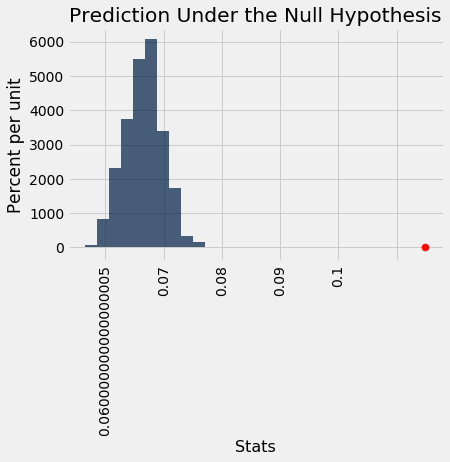

In [188]:
observed = calcy_observed()
# final = bootstrap()
up = Table().with_column('Stats', final)
up.hist()
plt.scatter(observed, 0, color='red', s=50)
plt.title('Prediction Under the Null Hypothesis')
print(observed)
print(np.mean(up.column(0)))

In [38]:
observed_statistic1 = np.average(y.column('Best Player Shots'))-np.average(y.column('Average Shots'))
print('Observed:', observed_statistic1)

Observed: 1.914250242248062


In [44]:
left = percentile(2.5, difference)
right = percentile(97.5, difference)

In [45]:
(left, right)

(1.8800551979512736, 2.0365353336101886)

In [20]:
best_name = y.where('Player Name', predicates.are.equal_to, 'Best_Player')
best_name.num_rows/y.num_rows

0.18313953488372092

In [21]:
# Comparing the max shooter to the average shooter

In [22]:
np.average((best_name.column('Number Shots'))-(best_name.column('Average Shots')))

ValueError: The column "Number Shots" is not in the table. The table contains these columns: Game, Player Name, Best Player Shots, Average Shots, HOME_TEAM, AWAY_TEAM, FIRST_INDEX, LAST_INDEX, Best_Player

In [ ]:
np.average((y.column('Number Shots'))-y.column('Average Shots'))

In [ ]:
# The number of shots when "best player" is "max shooting player".

In [ ]:
np.average(best_name.column('Number Shots'))

In [ ]:
np.average(y.column('Number Shots'))

# QUESTION 2

## Part 2.1: Helper Functions

In [1]:
def proportion(table):
    ## takes in a table and returns counts of how many shots were assisted/not assisted
    table = table.where('SHOT_MADE', 1)
    table = table.with_column('ASSIST_PLAYER_ID', table.apply(lambda x: str(x), 'ASSIST_PLAYER_ID'))

    # Create Assist Table
    a = table.where('ASSIST_PLAYER_ID', predicates.are.not_equal_to('nan'))
    a_count = a.num_rows

    # Create Unassisted Table
    ua = table.where('ASSIST_PLAYER_ID', predicates.are.equal_to('nan'))
    ua_count = ua.num_rows
    
    try:
        p = ua_count /(a_count + ua_count)
    except ZeroDivisionError:
        p = 0 
    return p

In [2]:
def six_minute_interval():
    
    start_time = time.time() 

    # get a random game from all games.
    first_game_id = 21500001
    last_game_id = 21501230
    rand_game_id = 21500001 + random.randint(0, last_game_id - first_game_id)
    
    game = Table().read_table('Tables/q2_game_' + str(rand_game_id) + '.csv', sep=',')
    
    # Random time between start and beginning of third
    # No overlap with last 6 mins
    max_time = 60 * 36
    time_start = random.randint(0, max_time)
    time_end = time_start + 60 * 6  # Add 360 seconds
    sampled_6min = game.where('TIME', predicates.are.above_or_equal_to(time_start)).\
        where('TIME', predicates.are.below_or_equal_to(time_end))
    
    return sampled_6min

In [145]:
table_x_1 = Table().read_table('question_2_1.csv')

In [146]:
def create_distributions():
    
    anyone1 = make_array()
    anyone2 = make_array()
    
    for i in np.arange(688):
     
        six_minutes1 = six_minute_interval()
        six_minutes2 = six_minute_interval()

        # calculate the test statistic
        kappa1 = proportion(six_minutes1)
        kappa2 = proportion(six_minutes2)
        
        # append test statistic to array
        anyone1 = np.append(anyone1, kappa1)
        anyone2 = np.append(anyone2, kappa2)
                    
    both = Table().with_columns('Any6 1', table_x_1.column(0), 'Any6 2', anyone2)
    
    return both

## Part 2.2: Find  Observation Value of Test Statistic (Last 6 versus Any 6)

Last 6,Any 6
0.454545,0.375
0.5,0.454545
1,0.3
0.2,0.5
0.666667,0.25
0.5,0.363636
0.416667,0.555556
0.461538,0.214286
0.272727,0.272727
0.375,0.636364


Total Variation Distance: 0.206416209166081


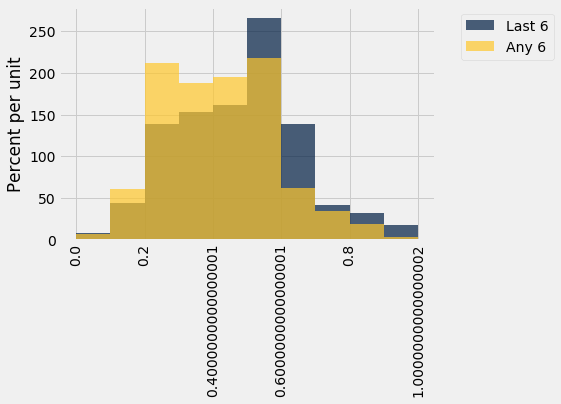

In [147]:
table_x_1 = Table().read_table('question_2_1.csv')
table_x_1.show(10)

# calculates total variation distance (test statistic)
def total_variation_distance(table):
    return sum(abs(table.column(0) - table.column(1)))/table.num_rows

observed_difference = total_variation_distance(table_x_1)

print('Total Variation Distance: ' + str(total_variation_distance(table_x_1)))
table_x_1.hist()

## Part 2.2: Simulate Under Null Hypothesis

In [9]:
def bootstrap(count):
    
    distances = make_array()
    for i in np.arange(count):
        results = create_distributions()
        distance = total_variation_distance(results)
        print('Test Statistic for distribution ', 1000 - i,': ', distance)
        distances = np.append(distances, distance)
    return distances

In [11]:
t = Table().read_table('bootstrap_r.csv')
t = t.relabel('Yes', "Variation Dist")
t

Variation Dist
0.196837
0.185803
0.188952
0.194665
0.189814
0.190286
0.192349
0.198002
0.192196
0.202752


P value is:  0.016
Average variation distance is:  0.1942502301672709
STD of variation distance is:  0.005602603402213031


Text(0.5,1,'Prediction Under the Null Hypothesis')

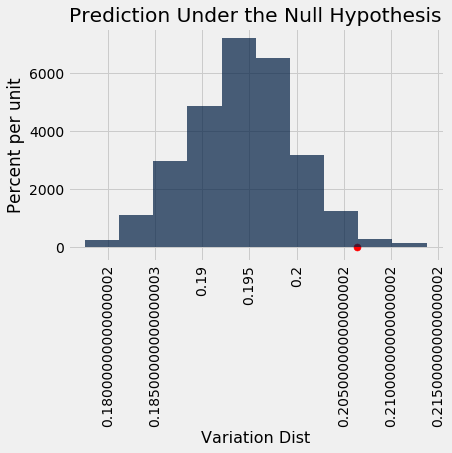

In [67]:
array = t.column("Variation Dist")
p_value = np.count_nonzero(array >= observed_difference)/1000
print('P value is: ', p_value)
print('Average variation distance is: ', np.mean(array))
print('STD of variation distance is: ', np.std(array))
t.hist()
plt.scatter(observed_difference, 0, color='red', s=50)
plt.title('Prediction Under the Null Hypothesis')

The red dot is the varaition distance for the observed value. The alternative is supported!

# Question 3 (Observational)

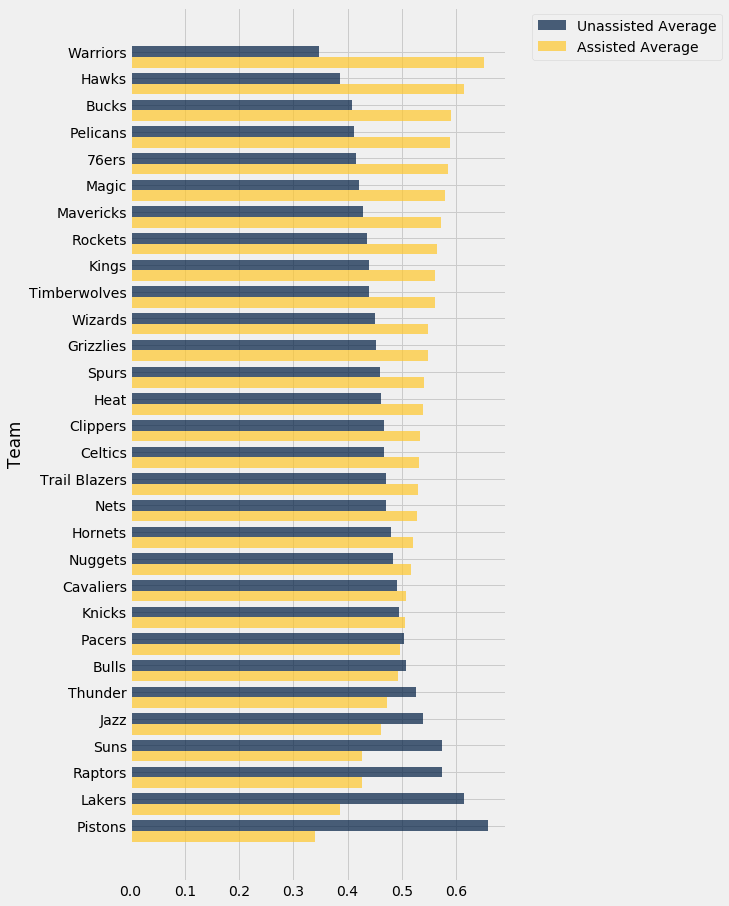

In [190]:
def split_away(game):
# This function is a helper takes a game and takes shots by home players only
    away_team = game.column('AWAY_TEAM').item(0)
    away_table = game.where('PLAYER1_TEAM_NICKNAME', away_team)
    return [away_table, away_team]

def split_home(game):
# This function is a helper takes a game and takes shots by away players only
    home_team = game.column('HOME_TEAM').item(0)
    home_table = game.where('PLAYER1_TEAM_NICKNAME', home_team)
    return [home_table, home_team]


def team_bins(last1, last_ref):
    


    teams = {'Hawks': [], 'Celtics': [], 'Nets': [], 'Hornets': [], 'Bulls': [], 'Cavaliers': [], 'Mavericks': [], 'Nuggets': [], 'Pistons': [], 'Warriors': [], 'Rockets': [],
        'Pacers': [], 'Clippers': [], 'Lakers': [], 'Grizzlies': [], 'Heat': [], 'Bucks': [], 'Timberwolves': [], 'Pelicans': [], 'Knicks': [], 'Thunder': [], 'Magic': [], '76ers': [], 'Suns': [], 
        'Kings': [], 'Spurs': [], 'Raptors': [], 'Jazz': [], 'Trail Blazers': [], 'Wizards': []}

    for i in np.arange(last_ref.num_rows):
        
        first = int(last_ref.row(i).item('FIRST_INDEX'))
        last = int(last_ref.row(i).item('LAST_INDEX'))
        game = last1.take(np.arange(first, last + 1))

        # split
        sh = split_home(game)
        sa = split_away(game)

        # name of home team/away team
        home_team = sh[1]
        away_team = sa[1]

        # home team/away team table
        home_game = sh[0]
        away_game = sa[0]

        # calc test statistic
        home_stat = proportion(home_game)
        away_stat = proportion(away_game)

        # add to table
        teams[home_team] = teams[home_team] + [home_stat]
        teams[away_team] = teams[away_team] + [away_stat]

    return teams
        

# For testing the team_bins
def test_team_bins(team_table):
    assert team_table.num_columns == 30, 'Team number ' + str(team_table.num_columns) + ' should be 30'
    assert team_table.num_rows == 82, 'Games number ' + str(team_table.num_columns) + ' should be 82'
    for c in np.arange(0, 30):
        for r in np.arange(0, 82):
            assert team_table.column(c).item(r) <= 1 and team_table.column(c).item(r) >= 0, 'column ' + srt(c) + 'row ' + srt(r) + ' proportion is invalid'
    print('Table passed!')
    return null

done = team_bins(close_games_under_six, game_ref)
done



done1 = {'Hawks': [], 'Celtics': [], 'Nets': [], 'Hornets': [], 'Bulls': [], 'Cavaliers': [], 'Mavericks': [], 'Nuggets': [], 'Pistons': [], 'Warriors': [], 'Rockets': [],
        'Pacers': [], 'Clippers': [], 'Lakers': [], 'Grizzlies': [], 'Heat': [], 'Bucks': [], 'Timberwolves': [], 'Pelicans': [], 'Knicks': [], 'Thunder': [], 'Magic': [], '76ers': [], 'Suns': [], 
        'Kings': [], 'Spurs': [], 'Raptors': [], 'Jazz': [], 'Trail Blazers': [], 'Wizards': []}


for key in done:
    done1[key] = [Table(make_array(key)).with_column(key, done[key])] + [np.mean(done[key])]
    
averages = Table(make_array('Team', 'Average'))
for key in done1:
    averages = averages.with_row([key, done1[key][1]])
    
averages = averages.with_column('Assisted Average', 1 - averages.column('Average')).relabel('Average', 'Unassisted Average')
    
averages.sort('Unassisted Average').barh('Team')



In [65]:
def generate_team_histogram(team_name):
    done1[team_name][0].hist(bins=np.arange(0, 1, 0.1))

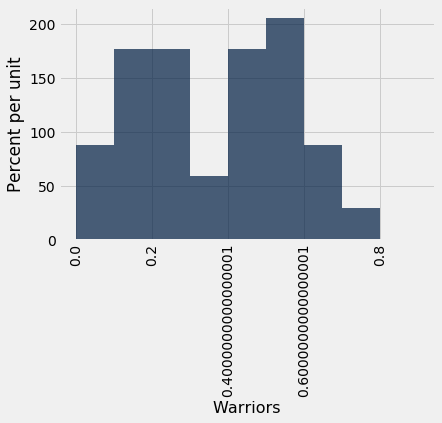

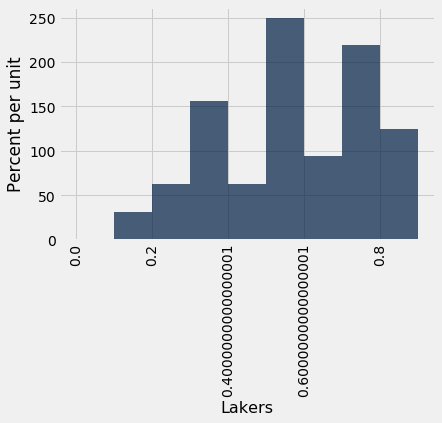

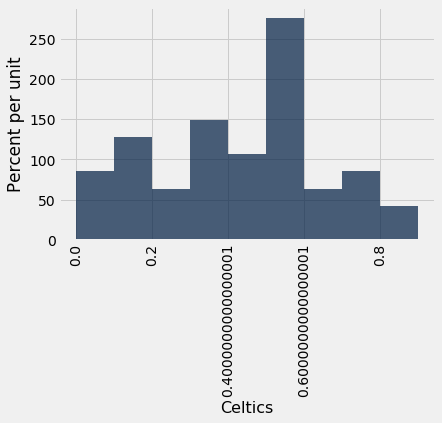

In [66]:
generate_team_histogram('Warriors')
generate_team_histogram('Lakers')
generate_team_histogram('Celtics')

# QUESTION 3

In [60]:
def best_player_last_six(allz, last, last_ref, all_ref):
    # This function takes in the last_six table, 
        # for each game in last:
            # calls split_game_teams
            # determines the best player for each table returned by split_game_teams
            # for each table returned:
                # calculates (u/(u+a)) just for best player only in the last 6 minutes.
                # calculates (u/(u+a)) for all other players only in the last 6 minutes.
                # calculates (u/(u+a)) for all players in the last 6 minutes.
                # calculates (u/(u+a)) for all other players in the entire game.
                # calculates (u/(u+a)) for all players in the entire game.
    # returns a table with 30 columns
        # column 1: Game Number
        # column 2: Team Name
        # column 3: Best Player
        # column 4: (u/(u+a)) just for best player only in the last 6 minutes.
        # column 5: (u/(u+a)) for all other players only in the last 6 minutes.
        # column 6: (u/(u+a)) for all players in the last 6 minutes.
        # column 7: (u/(u+a)) for all other players in the entire game.
        # column 8: (u/(u+a)) for all players in the entire game.
    return null


def test_best_player_last_six(best_games):
    #tests the best_player_function
    assert best_games.num_columns == 8, 'Column number ' + str(best_games.num_columns) + ' should be ' + str(8)
    assert best_games.num_rows == game_ref.num_rows * 2, 'Row number ' + str(best_games) + ' should be ' + str(game_ref.num_rows * 2)


            

